In [12]:
pip install pandas umap-learn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import umap
from mpl_toolkits.mplot3d import Axes3D

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
categories = None
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data
labels = newsgroups.target
label_names = newsgroups.target_names

In [16]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(words)

clean_texts = [preprocess(text) for text in texts]

Количество документов: 18846
Количество категорий: 20


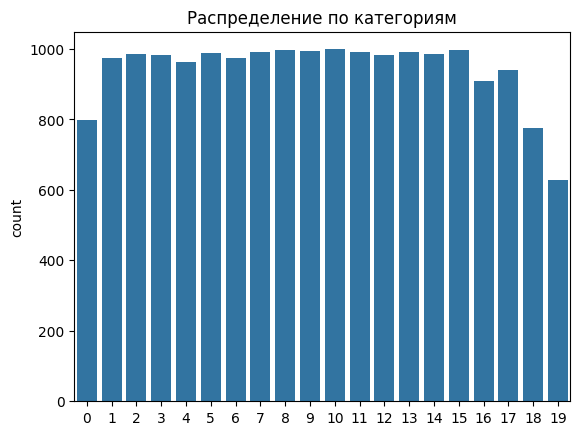

In [17]:
print(f"Количество документов: {len(clean_texts)}")
print(f"Количество категорий: {len(label_names)}")
sns.countplot(x=labels)
plt.title("Распределение по категориям")
plt.show()

In [18]:
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(clean_texts)
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 987375 stored elements and shape (18846, 10000)>
  Coords	Values
  (0, 8749)	0.06501679928568622
  (0, 6532)	0.5703480684205682
  (0, 3326)	0.0919981205946493
  (0, 6904)	0.07702952913279729
  (0, 1834)	0.1103787138405755
  (0, 5016)	0.09448713899940894
  (0, 4960)	0.07333700507623851
  (0, 6795)	0.069414144561141
  (0, 7315)	0.09239006004858784
  (0, 5476)	0.11147407673409425
  (0, 2495)	0.220757427681151
  (0, 103)	0.0691434395427032
  (0, 951)	0.20762032210885245
  (0, 4267)	0.06697058015844853
  (0, 3833)	0.13010929738232424
  (0, 7128)	0.0689547460656264
  (0, 2985)	0.07229311207961639
  (0, 7439)	0.11870289921017757
  (0, 6832)	0.12746132544172029
  (0, 5407)	0.07989985817041557
  (0, 4958)	0.09892264652494906
  (0, 9854)	0.09635795780139879
  (0, 9022)	0.0724251058022858
  (0, 4793)	0.27380114017354773
  (0, 8153)	0.10229402602161874
  :	:
  (18845, 7141)	0.16875383732402852
  (18845, 6971)	0.3010406814279558
  (18845

In [19]:
kmeans = KMeans(n_clusters=len(label_names), random_state=42)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


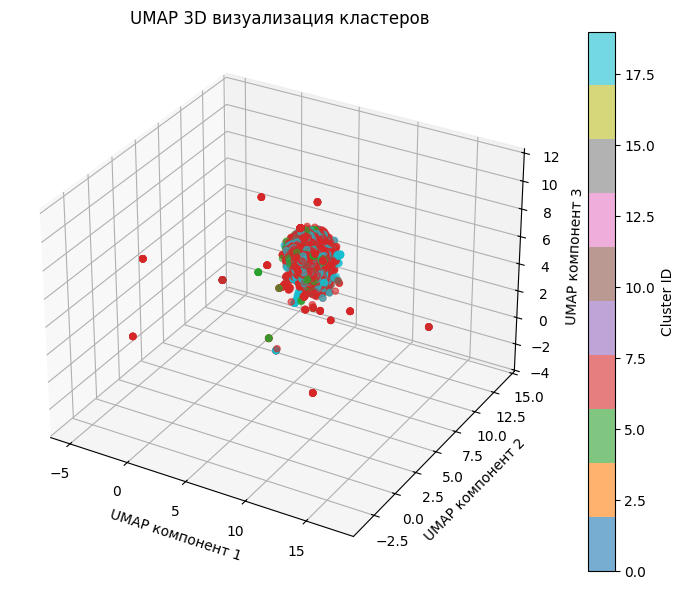

In [20]:
umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_model.fit_transform(X.toarray())

# Визуализируем результаты кластеризации в 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2],
                     c=clusters, cmap='tab10', alpha=0.6)

ax.set_title("UMAP 3D визуализация кластеров")
ax.set_xlabel("UMAP компонент 1")
ax.set_ylabel("UMAP компонент 2")
ax.set_zlabel("UMAP компонент 3")
plt.colorbar(scatter, ax=ax, label='Cluster ID')
plt.show()

In [21]:
ari = adjusted_rand_score(labels, clusters)
sil_score = silhouette_score(X, clusters)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Silhouette Score: {sil_score:.4f}")

Adjusted Rand Index (ARI): 0.0353
Silhouette Score: -0.0118


<ipython-input-22-712638e64f89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='coolwarm')
<ipython-input-22-712638e64f89>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=clusters, palette='viridis')


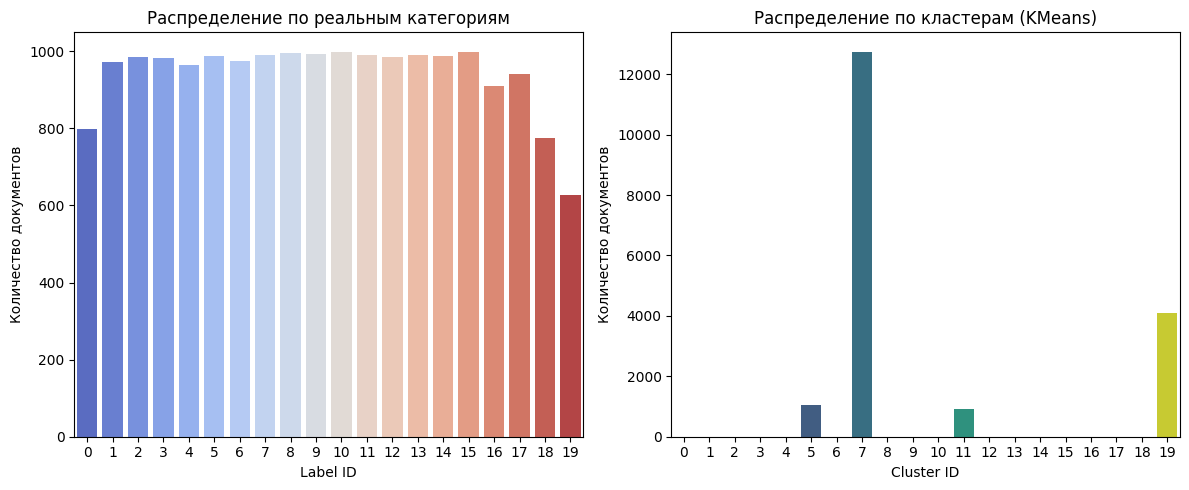

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=labels, palette='coolwarm')
plt.title("Распределение по реальным категориям")
plt.xlabel("Label ID")
plt.ylabel("Количество документов")

plt.subplot(1, 2, 2)
sns.countplot(x=clusters, palette='viridis')
plt.title("Распределение по кластерам (KMeans)")
plt.xlabel("Cluster ID")
plt.ylabel("Количество документов")

plt.tight_layout()
plt.show()

ari = adjusted_rand_score(labels, clusters)
sil_score = silhouette_score(X, clusters)



In [23]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, labels, test_size=0.15, stratify=labels, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1765, stratify=y_trainval, random_state=42)

print(f"Train size: {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 13191
Validation size: 2828
Test size: 2827


In [24]:
!pip install evaluate
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset
from transformers import Trainer, TrainingArguments
import numpy as np
import torch
import evaluate


In [25]:
idx_all = list(range(len(clean_texts)))

idx_trainval, idx_test = train_test_split(idx_all, test_size=0.15, stratify=labels, random_state=42)
idx_train, idx_val = train_test_split(idx_trainval, test_size=0.1765, stratify=[labels[i] for i in idx_trainval], random_state=42)

X_train_texts = [clean_texts[i] for i in idx_train]
y_train = [labels[i] for i in idx_train]

X_val_texts = [clean_texts[i] for i in idx_val]
y_val = [labels[i] for i in idx_val]

X_test_texts = [clean_texts[i] for i in idx_test]
y_test = [labels[i] for i in idx_test]


In [26]:
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_names))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

In [28]:
train_dataset = TextDataset(X_train_texts, y_train)
val_dataset = TextDataset(X_val_texts, y_val)
test_dataset = TextDataset(X_test_texts, y_test)


In [29]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",  # eval_strategy заменен на evaluation_strategy
    save_strategy="epoch",  # добавлено save_strategy, чтобы совпало с evaluation_strategy
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

In [30]:
accuracy = evaluate.load("accuracy")

In [31]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return accuracy.compute(predictions=preds, references=labels)

In [ ]:

trainer = Trainer(
model=model,
args=training_args,
train_dataset=train_dataset,
eval_dataset=val_dataset,
compute_metrics=compute_metrics,
)

trainer.train()
trainer.evaluate(test_dataset)

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: slava-stelmashov (slava-stelmashov-institution) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
